# Webscraping Tutorial

packages needed:
- bs4 documentation: [https://www.crummy.com/software/BeautifulSoup/bs4/doc/](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- pandas
- matplotlib

Webscraping generally works where a particular page has a specific point of data that you want to obtain, either on multiple similar pages, or in a time-based scrape.

Browser is receiving text, so we mock up a request to get that same text and then parse through to get the piece of data that we want

# Scraping API Endpoints

Mapping the ISS!

In [3]:
import urllib.request
import json

In [4]:
def scrapeISSAPI():
    response = urllib.request.urlopen("http://api.open-notify.org/iss-now.json")
    result = json.loads(response.read())
    return result

print(scrapeISSAPI())

{'iss_position': {'longitude': '179.5858', 'latitude': '18.5004'}, 'timestamp': 1539040785, 'message': 'success'}


In [5]:
import time

scrapes = 100
data = []
for i in range(0, scrapes):
    print("Scrape {0}".format(i))
    result = scrapeISSAPI()
    data.append({
        "time":result["timestamp"], 
        "lat":result["iss_position"]["latitude"], 
        "lon":result["iss_position"]["longitude"]
    })
    time.sleep(1)

data

Scrape 0
Scrape 1
Scrape 2
Scrape 3
Scrape 4
Scrape 5
Scrape 6
Scrape 7


KeyboardInterrupt: 

## Doing Data Sciency things with Pandas and Matplotlib

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

First we want to make a pandas dataframe from that array of dictionaries that we collected.

In [42]:
df = pd.DataFrame(data)
df

,lat,lon,time
0,18.5249,179.6061,1539040786
1,18.5740,179.6467,1539040787
2,18.6477,179.7077,1539040788
3,18.6967,179.7484,1539040789
4,18.7703,179.8095,1539040791
5,18.8193,179.8502,1539040792
6,18.8929,179.9114,1539040793
7,18.9419,179.9523,1539040794


fig1, axes1 = plt.subplots()

x = df.lat
y = df.lon

axes1.clear()
#axes1.scatter(x,y)
axes1.plot(x,y)

# Scraping a website

In [7]:
from bs4 import BeautifulSoup

In [8]:
url = "https://soundcloud.com/charts/top"

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
page = response.read().decode('utf-8')

'<!DOCTYPE html>\n\n<html lang="en">\n<head>\n  <meta charset="utf-8">\n  \n  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n  \n  <link rel="dns-prefetch" href="//style.sndcdn.com">\n  <link rel="dns-prefetch" href="//a-v2.sndcdn.com">\n  <link rel="dns-prefetch" href="//api-v2.soundcloud.com">\n  <link rel="dns-prefetch" href="//sb.scorecardresearch.com">\n  <link rel="dns-prefetch" href="//secure.quantserve.com">\n  <link rel="dns-prefetch" href="//eventlogger.soundcloud.com">\n  <link rel="dns-prefetch" href="//api.soundcloud.com">\n  <link rel="dns-prefetch" href="//ssl.google-analytics.com">\n  <link rel="dns-prefetch" href="//i1.sndcdn.com">\n  <link rel="dns-prefetch" href="//i2.sndcdn.com">\n  <link rel="dns-prefetch" href="//i3.sndcdn.com">\n  <link rel="dns-prefetch" href="//i4.sndcdn.com">\n  <link rel="dns-prefetch" href="//wis.sndcdn.com">\n  <link rel="dns-prefetch" href="//va.sndcdn.com">\n  <link rel="dns-prefetch" href="//pixel.quantserve.com">\n\n 
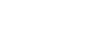
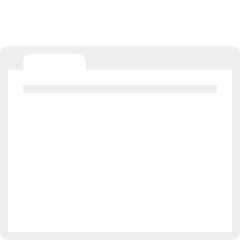

In [9]:
page

In [10]:
soup = BeautifulSoup(page)
content = soup.body
tracks_container = soup.find_all(class_="sounds")[0]
song_artist_combos = tracks_container.find_all("h2")[1:]

In [11]:
song_data = []
i = 0
for entry in song_artist_combos:
    i += 1
    elements = entry.find_all("a")
    name = elements[0].string
    artist = elements[1].string
    song_data.append({"rank":i, "song": name, "artist":artist})
    print("{0} :: {1}".format(name, artist))

Lil Peep & XXXTENTACION - Falling Down :: ☆LiL PEEP☆
Drip Too Hard :: Lil Baby
New Patek :: LIL UZI VERT
Lucid Dreams :: Juice WRLD
sheck wes - mo bamba (prod. 16yrold & take a daytrip) :: 16yrold
FEFE (Feat. Nicki Minaj & Murda Beatz) :: 6IX9INE
Kanye West & Lil Pump - I Love It :: Kanye West
XXXTENTACION - Fuck Love  (feat. Trippie Redd) :: XXXTENTACION
All Girls Are The Same :: Juice WRLD
HOPE :: XXXTENTACION
Leave Me Alone (Prod. by Young Forever x Cast Beats) :: Flipp Dinero
Taste (feat. Offset) :: Tyga
YNW MELLY - MURDER ON MY MIND Prod By; SMKEXCLSV :: Ynw Melly
lil peep - star shopping (prod. kryptik) :: Jack
Trip :: Ella Mai
I Kill People! ft Tadoe & Chief Keef [Produced by: Ozmusiqe] RR :: Trippie Redd
Lean Wit Me :: Juice WRLD
Noticed :: Lil Mosey
juice wrld - legends :( :: Juice WRLD
Close Friends :: Lil Baby
Eminem - KILLSHOT (Machine Gun Kelly MGK DISS) rap devil response :: WorldStarHipHop Radio
I don't wanna do this anymore :: XXXTENTACION
Walk :: COMETHAZINE
Marshmell

In [13]:
df = pd.DataFrame(song_data)
df

,artist,rank,song
0,☆LiL PEEP☆,1,Lil Peep & XXXTENTACION - Falling Down
1,Lil Baby,2,Drip Too Hard
2,LIL UZI VERT,3,New Patek
3,Juice WRLD,4,Lucid Dreams
4,16yrold,5,sheck wes - mo bamba (prod. 16yrold & take a d...
5,6IX9INE,6,FEFE (Feat. Nicki Minaj & Murda Beatz)
6,Kanye West,7,Kanye West & Lil Pump - I Love It
7,XXXTENTACION,8,XXXTENTACION - Fuck Love (feat. Trippie Redd)
8,Juice WRLD,9,All Girls Are The Same
9,XXXTENTACION,10,HOPE


<IPython.core.display.Javascript object>


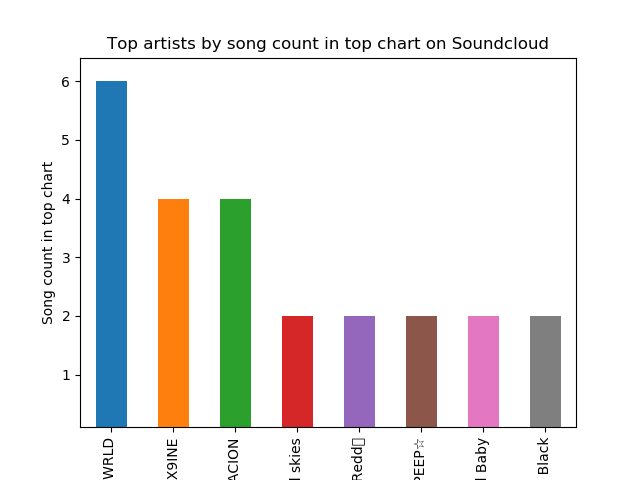

Text(0, 0.5, 'Song count in top chart')

In [40]:
axes = df.artist.value_counts()[df.artist.value_counts() > 1].plot(kind="bar")
axes.set_title("Top artists by song count in top chart on Soundcloud")
axes.set_ylabel("Song count in top chart")

In [34]:
df[df.artist.str.contains("lil", False)]

,artist,rank,song
0,☆LiL PEEP☆,1,Lil Peep & XXXTENTACION - Falling Down
1,Lil Baby,2,Drip Too Hard
2,LIL UZI VERT,3,New Patek
17,Lil Mosey,18,Noticed
19,Lil Baby,20,Close Friends
25,lil skies,26,Lust [prod. CashMoneyAp]
37,Lil Tjay,38,Lil TJAY - Brothers Prod by [JDONTHATRACK] & [...
40,☆LiL PEEP☆,41,Save That Shit (prod. by smokeasac & IIVI)
46,lil skies,47,Creeping (feat. Rich The Kid)[prod. by Menoh B...
